# 3.4.1 주성분 분석(PCA)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다. 

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from sklearn.model_selection import train_test_split as tts

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


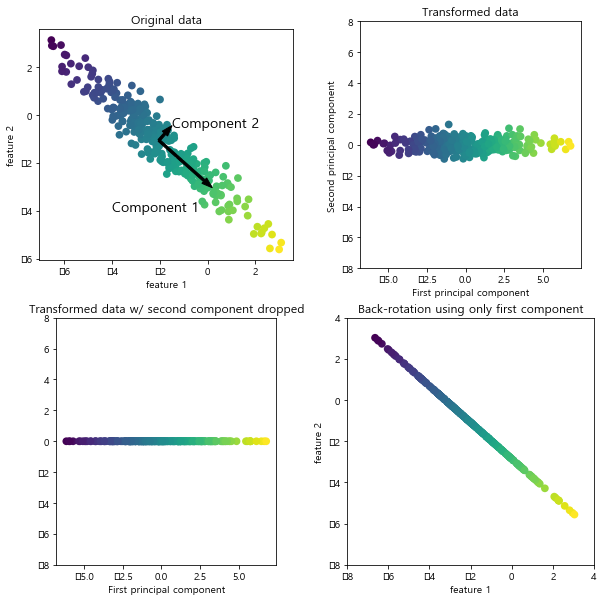

In [3]:
mglearn.plots.plot_pca_illustration()

**첫 번째 그래프**는 원본 데이터 포인트를 색으로 구분해 표시한 것이다. 이 알고리즘은 먼저 "성분1" 이라고 쓰여 있는, 분산이 가장 큰 방향을 찾는다. 이 방향이 데이터에서 가장 많은 정보를 담고 있는 방향이다. 다른 말로, 특성들의 상관관계가 가장 큰 방향이다. 그다음으로. 이 알고리즘은 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다. 2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 무한히 많은 직각 방향이 있을 수 있다. 두 성분을 화살표로 나타냈지만, 사실 화살표의 머리와 꼬리는 아무 의미가 없다. 즉 화살표를 중앙에서 오른쪽 아래로 향하게 그리지 않고 왼쪽 위로 향하게 그릴 수도 있다. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 **주성분**이라고 한다. 일반적으로 원본 특성 개수만큼의 주성분이 있다.

**두 번째 그래프**는 같은 데이터지만 주성분 1과 2를 각각 x 축과 y 축에 나란하도록 회전한 것이다. 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 **상관관계 행렬**이 대각선 방향을 제외하고는 0이 된다. 

PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다. 이 예에서는 위 그림의 세 번째 그래프처럼 첫 번째 주성분만 유지하려고 한다. 이렇게 하면 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소한다. 그러나 단순히 원본 특성 중 하나만 남기는 것은 아니다. 가장 유용한 방향을 찾아서 그 방향의 성분, 즉 첫 번째 주성분을 유지하는 것이다.

마지막으로 데이터에 다시 평균을 더하고 반대로 회전시킨다. 이 결과가 마지막 그래프이다. 이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는 데 종종 사용한다.

**PCA를 적용해 유방암 데이터셋 시각화 하기**


많은 특성을 가진 데이터셋의 산점도 행렬을 그리는데에 문제가 있음. 이를 해결하는 방법으로는 각 특성별 목적 변수에 대한 히스토그램을 그리는것.

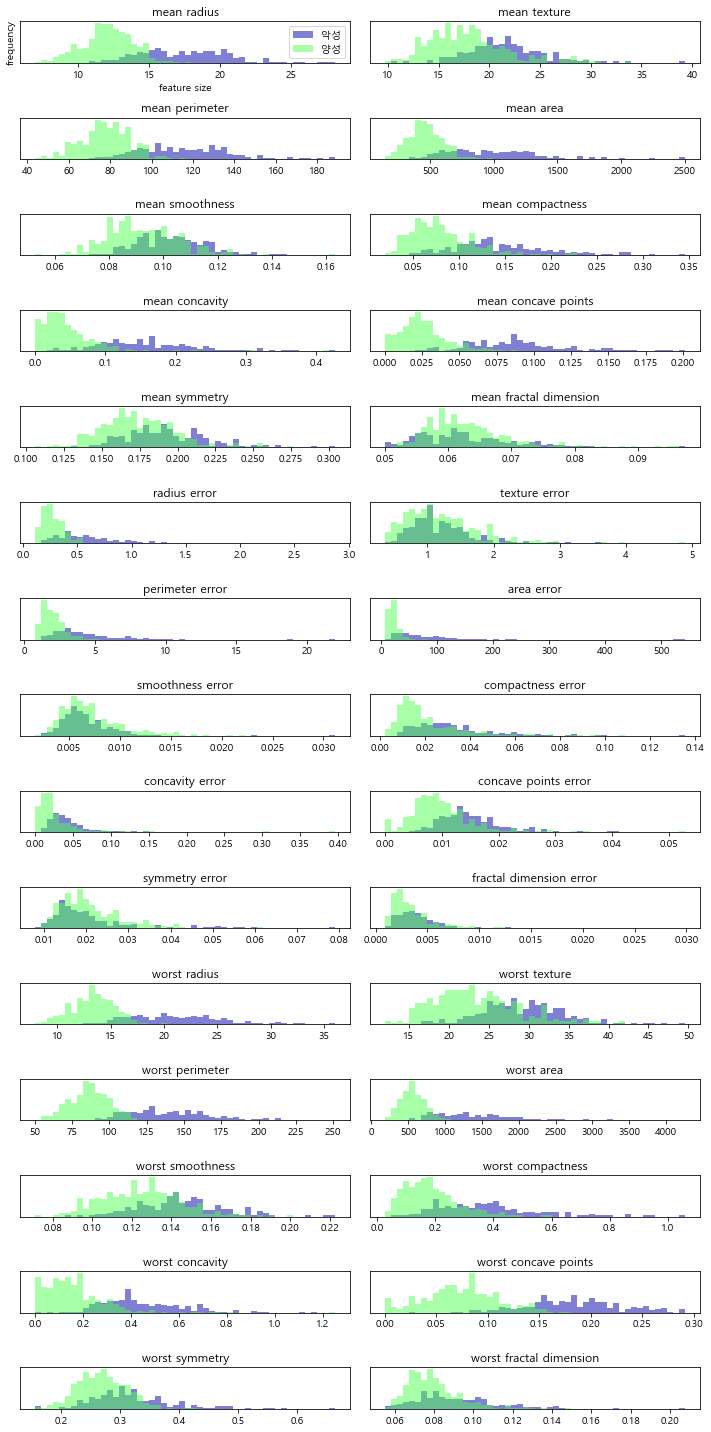

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("feature size")
ax[0].set_ylabel("frequency")
ax[0].legend(["악성","양성"], loc='best')
fig.tight_layout()

이 그림은 각 특성에 대한 히스토그램으로 특정 간격에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것이다. 각 그래프는 히스토그램 두 개를 겹쳐놓은 것으로 초록색은 양성 클래스의 포인트를, 그리고 푸른색은 악성 클래스의 포인트를 나타낸다. 이 그림은 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고, 이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지 가늠해볼 수 있다. 예를 들어 "smoothness error" 특성은 두 히스토그램이 거의 겹쳐져 별로 쓸모가 없다. 하지만 "worst concave points"는 두 히스토그램이 확실히 구분되어 매우 유용한 특성이다. 

그러나 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다, PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그리믈 만들 수 있다. 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화해보겠다.

PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데ㅣ터의 스케일을 조정한다.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

PCA 변환을 학습하고 적용하는 것은 데이터 전처리만큼 간단하다. PCA 객체를 생성하고, fit 메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소한다. 기본값일 때 PCA는 데이터를 회전만 시키고 모든 주성분을 유지한다. 데이터의 차원을 줄이려면 PCA 객체를 만들 때 얼마나 많은 성분을 유지할지 알려줘야한다.

In [6]:
from sklearn.decomposition import PCA
# 데이터의 청ㅁ 두 개 주성분만 유지시킨다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만든다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환한다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, 'Second principal')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


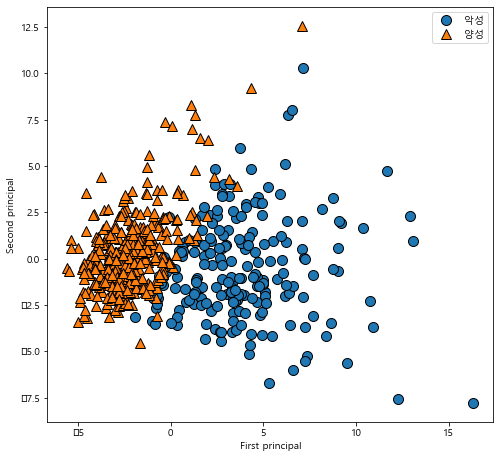

In [7]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타낸다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["악성","양성"], loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal")
plt.ylabel("Second principal")

PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않는다. 단순히 데이터에 있는 상관관계만 고려함. 이 산점도는 첫 번째 주성분과 두 번째 주성분을 사용하여 만들었고 클래스 정보를 이용하여 포인트의 모양을 구분하였다. 두 클래스가 2차원 공간에서 꽤 잘 구분 되는 것을 볼 수 있다. 이런 그림이라면 선형 분류기로도 두 클래스를 잘 구분할 수 있을 것 같음. 또 악성 포인트가 양성 포인트보다 더 넓게 퍼져있는 것을 볼 수 있으며 이는 이전 히스토그램에서도 확인 할 수있다.

PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점이다. 주성분은 우너본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다. 이런 조합이 보통 매우 복잡하다. PCA 객체가 학습될 때 components_ 속성에 주성분이 저장된다.

In [8]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


components_의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있다. 열은 우너본 데이터의 특성에 대응하는 값. 이 예에서는 "mean radius", "mean texture" 등이다. 

In [9]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'principal')

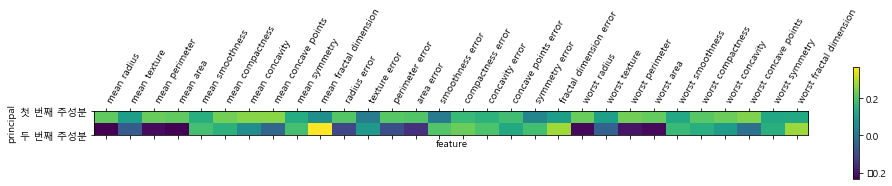

In [10]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha= 'left')
plt.xlabel("feature")
plt.ylabel("principal")

첫 번째 주성분의 모든 특성은 부호가 같다(모두 양수지만, 앞서 언급한 대로 주성분의 화살표 방향은 의미가 없다). 이 말은 모든 특성 사이에 공통의 상호관계가 있다는 뜻이다. 따라서 한 특성의 값이 커지면 다른 값들도 같이 높아질 것이다. 두 번째 주성분은 부호가 섞여 있고 두 주성분 모두 30개의 특성이 있다. 모든 특성이 섞여 있기 때문에 위 그림의 축이 가지는 의미를 설명하기가 쉽지않다.

# 고유얼굴(eigenface) 특성 추출

PCA는 특성 추출에도 이용할 수 있다. 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있으리란 생각에서 출발한다. 이미지를 다루는 애플리케이션은 특성 추출이 도움이 될만한 좋은 사례이다. 이미지는 적색, 녹색, 청색의 강도가 기록된 픽셀로 구성된다. 보통 이미지 안의 물체는 수천개의 픽셀로 이뤄지며 함께 모여 있을 때 의미가 있다.

PCA를 이용하여 LFW(Labeled Faces in the Wild)데이터셋의 얼굴 이미지에서 특성을 추출하는 아주 간단한 애플리케이션을 만들어보자. 이 데이터셋은 인터넷에서 내려받은 유명 인사들의 얼굴 이미지들을 포함한다. 이번 예제에서는 처리 속도를 높이고자 흑백 이미지를 사용하고, 스케일을 줄였다.

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

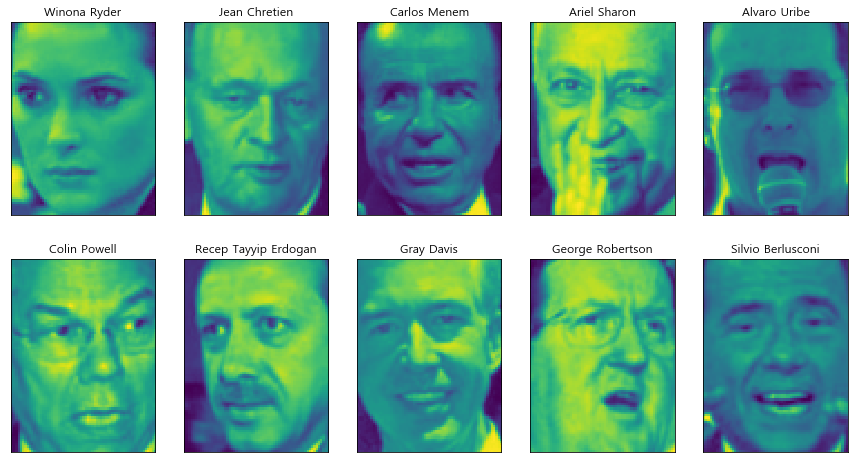

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw = {'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
print("people.images.shape:", people.images.shape) 
# LFW 데이터셋에는 62명의 얼굴 이미지가 총 3023개가 있으며 각 이미지의 크기는 87x65이다.
print("클래스 개수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


이 데이터셋은 조금 편중되어서, 조지 부시와 콜린 파월의 이미지가 많다.

In [14]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end='   ')
    if (i+1)%3==0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택한다.(이렇게 하지 않으면 조지 부시 이미지에 치우친 특성이 추출된다)

In [15]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정한다.
# MinMaxScaler를 적용하는 것과 거의 같다.
X_people = X_people/255.

얼굴 인식이라 하면 통상적으로 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중 하나에 속하는지 찾는 작업이다. 사진 애플리케이션, 소셜 미디어, 보안 애플리케이션들이 이에 속한다. 해결 방법 중 하나는 각 사람을 서로 다른 클래스로 구분하는 분류기를 만드는 것이다. 하지만 보통 얼굴 데이터 베이스에는 사람의 수가 많지만 각 사람에 대한 이미지는 적다. 이런 문제 때문에 대부분의 분류기를 훈련시키기 어렵다. 그리고 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수도 있어야 한다.

간단한 방법으로, 분류하려는 얼굴과 가징 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기를 사용할 수 있다. 이 분류기는 원칙적으로 클래스마다 하나의 훈련 샘플을 사용한다. KNeighborsClassifier가 얼마나 잘 적용되는지 보겠다.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = tts(X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


정확도가 23%이다. 클래스 62개를 분류하는 문제에서 아주 나쁜 결과는 아니지만(무작위로 분류하는 정확도는 1/62 = 1.6%), 그렇다고 좋은 결과도 아니다. 네 번에 한 번 꼴로만 올바르게 인식한다.

그래서 PCA가 필요하다. 얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 매우 나쁜 방법이다. 픽셀을 사용해서 두 이미지를 비교할 때, 각 픽셀의 회색톤값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교한다. 이런 방식은 사람이 얼굴 이미지를 인식하는 것과는 많이 다르고, 픽셀을 있는 그대로 비교하는 방식으로는 얼굴의 특징을 잡아내기가 어렵다. 예를 들어 픽셀을 비교할 때 얼굴 위치가 한 픽셀만 오른쪽으로 이동해도 큰 차이를 만들어 완전히 다른 얼굴로 인식하게 된다. 그래서 주성분으로 변환하여 거리를 계산하면 정확도가 높아지지 않을까 기대해본다. 여기서는 PCA의 화이트닝 옵션을 사용해서 주성분의 스케일이 같아지도록 조정한다. 이는 화이트닝 옵션 없이 변환한 후에 StandardScaler를 적용하는 것과 같다. 

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


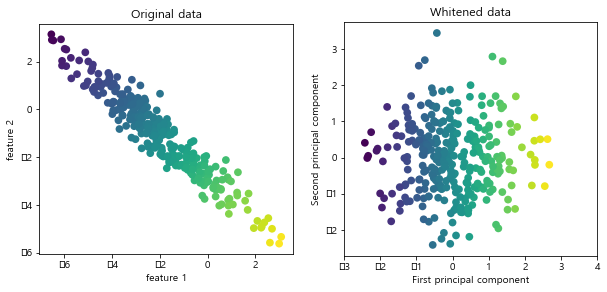

In [17]:
mglearn.plots.plot_pca_whitening()

PCA 객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출한다. 그런 다음 훈련 데이터와 테스트 데이터를 변환한다.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca,y_test)))

테스트 세트 정확도: 0.31


모델의 정확도가 23% 에서 31% 로 크게 향상되었으므로 주성분이 데이터를 더 잘 표현한다고 직관적으로 판단할 수 있다.

이지미 데이터일 경우엔 계산한 주성분을 쉽게 시각화할 수 있다. 주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향이라는 것을 기억하면, 입력 차원은 87X65픽셀의 흑백 이미지이고, 따라서 이 공간의 어떤 방향도 87X65픽셀의 흑백 이미지이다.

In [20]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


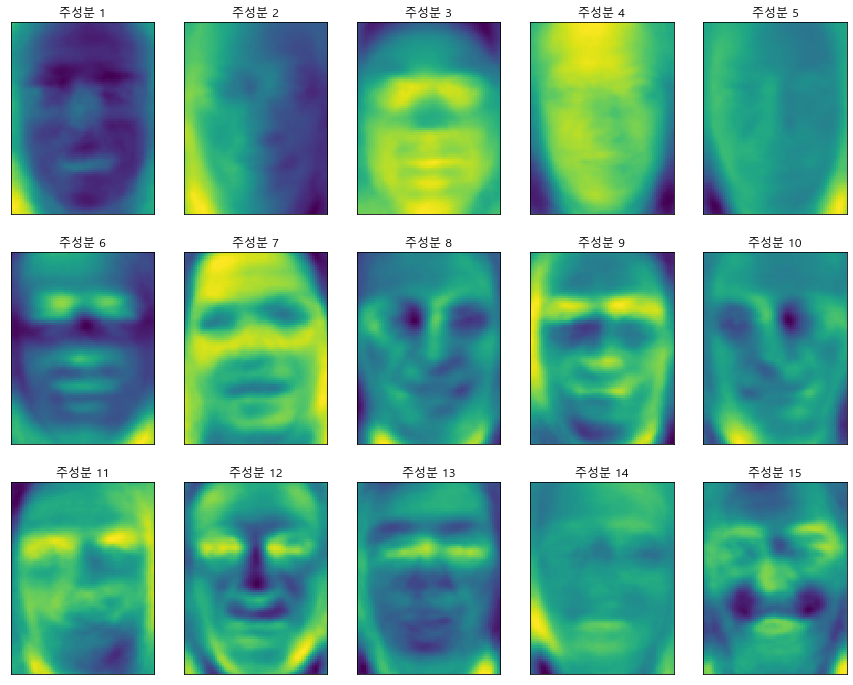

In [21]:
fig, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

이 주성분들을 완전하게 이해할 순 없지만 몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작 해볼 수 있다. 첫 번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것으로 보이며, 두 번째 주성분은 오른쪽과 왼쪽 조명의 차이를 담고 있는 것 등이다. 이런 방식이 원본 픽셀 값을 사용하는 것보다 더 의미 있지만, 여전히 사람이 얼굴을 인식하는 방식과는 거리가 멀다. 이 PCA 모델은 픽셀을 기반으로 하므로, 얼굴의 배치와 조명이 두 이미지가 얼마나 비슷한지 판단하는 데 큰 영향을 준다. 하지만 사람이라면 얼굴의 배치와 조명부터 인지하지는 않는다. 사람은 얼굴의 비슷한 정도를 평가할 때 나이, 성별, 표정, 머리 모양 같이 픽셀의 강도로 표현하지 어려운속성들을 사용한다. 알고리즘이 데이터를 해석하는 방식은 사암의 방식과는 상당히 다르다는 것을 알아야한다.

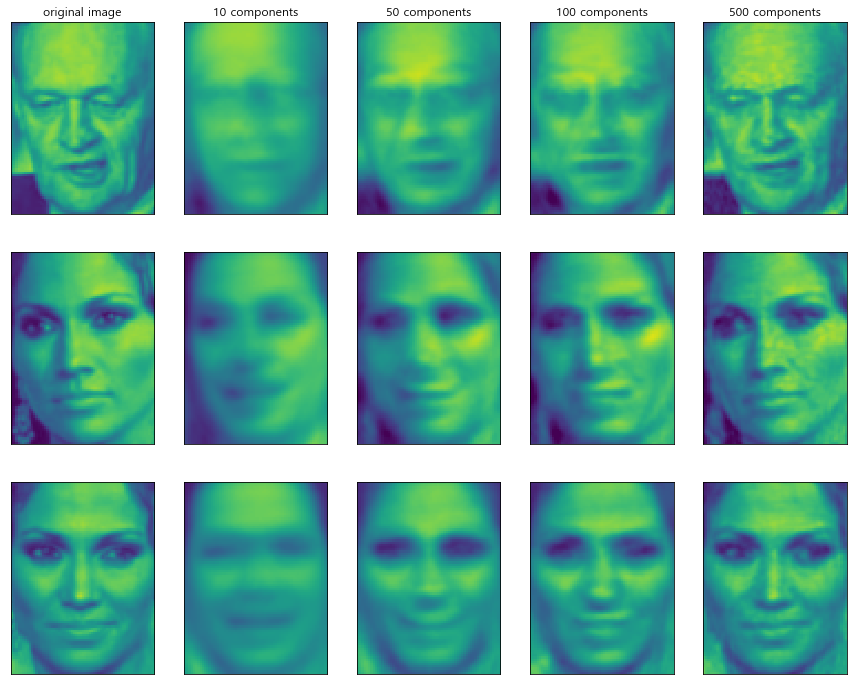

In [22]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

주성분을 10개만 사용했을 땐 얼굴의 각도, 조명 같은 이미지의 기본 요소만 나타난다. 주성분을 더 많이 사용할수록 이미지가 더욱 상세해진다.

# 3.4.2 비음수 행렬 분해(NMF)

NMF(non-negative matrix factorization)는 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘이다. 이 알고리즘은 PCA와 비슷하고 차원 축소에도 사용할 수 있다. PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수 값을 찾는다. 즉, 주성분과 계수가 모두 0보다 크거나 같아야 한다. 음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다.

음수 아닌 가중치 하븡로 데이터를 분해하는 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여(덮어써서) 만들어진 데이터에 특히 유용하다. 이럴 때 NMF는 섞여있는 데이터에서 원본 성분을 구분할 수 있다. 음수로 된 성분이나 계수가 만드는 상쇄 효과를 이해하기 어려운 PCA보다 대체로 NMF의 주성분이 해석하기 쉽다.

**인위적 데이터에 NMF 적용하기**

PCA를 사용할 때와는 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야한다. 이 말은 데이터가 원점 에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요하다는 뜻이다. 그렇기 때문에 원점에서 데이터로 가는 방향을 추출할 것으로 음수 미포함 성분을 이해할 수 있다.

다음의 예는 2차원 예제 데이터에 NMF를 적용한 결과를 보여준다.

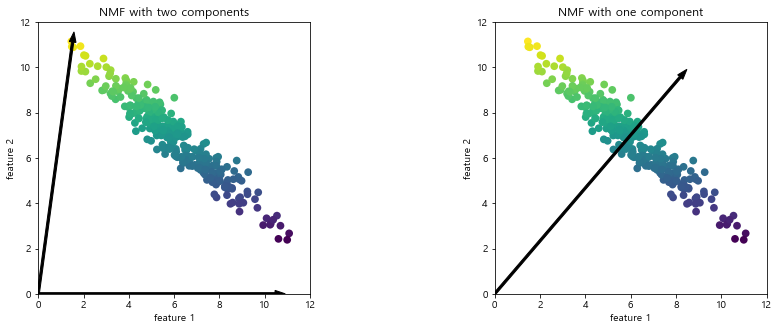

In [23]:
mglearn.plots.plot_nmf_illustration()

왼쪽은 성분이 둘인 NMF로, 데이터셋의 모든 포인트를 양수로 이뤄진 두 개의 성분으로 표현할 수 있다. 데이터를 완벽하게 재구성할 수 있을 만큼 성분이 아주 많다면(즉, 특성 개수만큼 많다면), 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것이다. 

하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만든다. PCA와는 반대로 성분 개수를 줄이면 특정 방향이 제거되는 것뿐만 아니라 전체 성분이 완전히 바뀐다. NMF에서 성분은 특정 방식으로 정렬되어 있지도 않아서 "첫 번째 비음수 성분" 같은 것이 없다. 즉 모든 성분을 동등하게 취급한다.

NMF는 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라진다. 두 개의 성분으로 모든 데이터를 완벽하게 나타낼 수 있는 이런 간단한 예에서는 난수가 거의 영향을 주지 않는다. 하지만 복잡한 경우에는 큰 차이를 만들 수도 있다.

**얼굴 이미지에 NMF 적용하기**-

앞에서 사용한 LFW 데이터셋에 NMF를 적용해보겠다. NMF의 핵심 매개변수는 추출할 성분의 개수이다. 보통 이 값은 특성의 개수보다 작다. 

먼저 NMF를 사용해 데이터를 재구성하는 데 성분의 개수가 어떤 영향을 주는지 살펴보자.

In [27]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape) # 계산량이 많아서 잘안됨.

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


KeyboardInterrupt: 

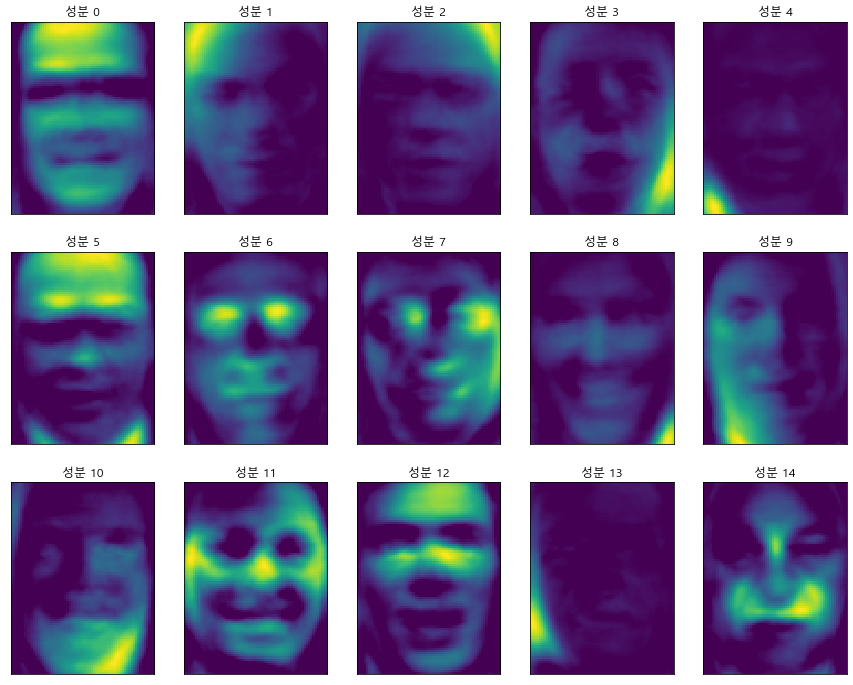

In [24]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component,ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

이 성분들은 모두 양수 값이어서 PCA 성분보다 훨씬 더 얼굴 원형처럼 보인다. 예를 들면 성분 3은 오른쪽으로 조금 돌아간 얼굴로 보이고 성분 7은 왼쪽으로 조금 회전한 얼굴로 보인다. 이 성분들이 특별히 강하게 나타난 이미지들을 살펴보겠다.

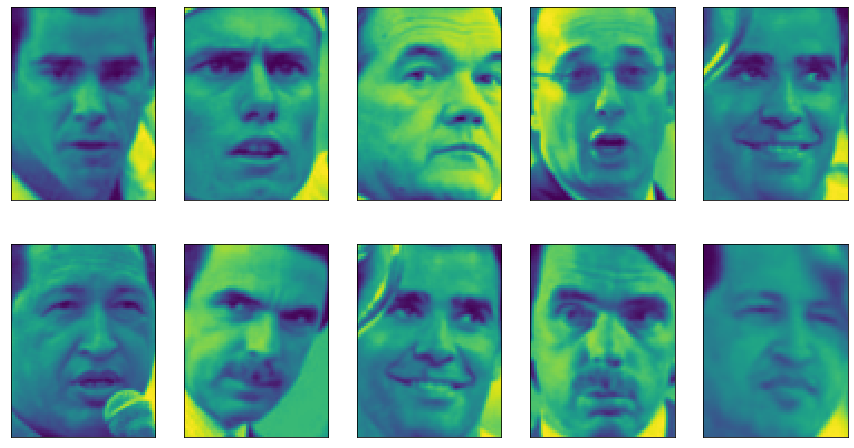

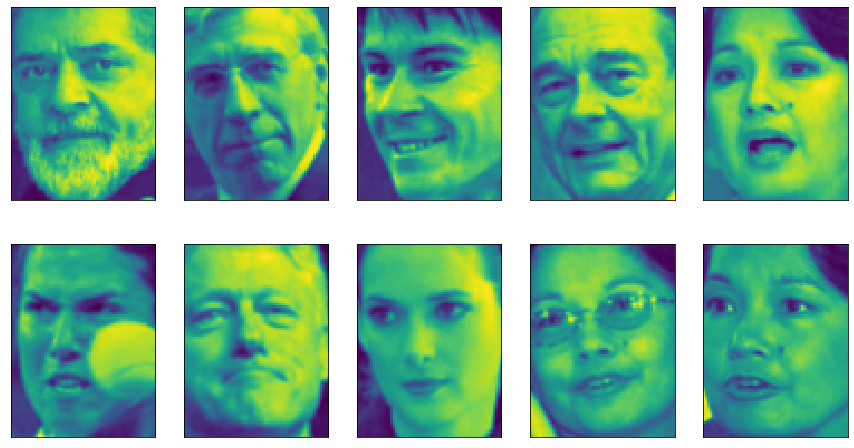

In [25]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력한다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw = {'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력한다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw = {'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    

예상대로 성분 7에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아가 있고, 성분 3에 대한 계수 값이 큰 얼굴들은 오른쪽으로 돌아가 있다. 앞서 말한 것처럼, 이와 같은 패턴을 추출하는 것은 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합하다. 인위적인 데이터셋을 사용한 예를 통해 이에 관해 자세히 살펴보자.

Text(0, 0.5, 'Signal')

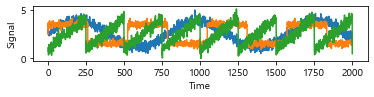

In [26]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

우리는 원본 신호는 볼 수 없고 이 세 개가 섞인 신호만 관찰할 수 있는 상황이다. 그래서 합쳐진 신호를 분해해서 원본 신호를 복원해야 한다. 이 신호를 여러 방법으로 관찰할 수 있고 각 장치는 일련의 측정 데이터를 제공한다고 가정한다.

In [27]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만든다.
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


NMF를 사용해 세 개의 신호를 복원한다.

In [28]:
nmf = NMF(n_components=3, random_state = 42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


비교를 위해서 PCA도 적용한다.

In [29]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

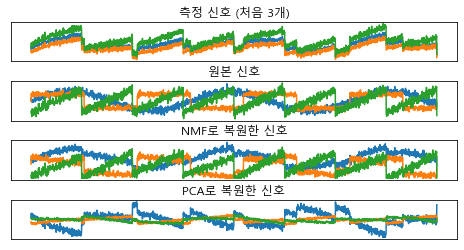

In [30]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)', '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': .5}, subplot_kw = {'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

참고를 위해 X에 담긴 측정 데이터 100개 중 처음 3개를 함께 그래프로 나타냈다. 그래프에서 볼 수 있듯이 NMF는 원본 신호를 잘 복원했지만 PCA는 실패했고 데이터 변동의 대부분을 첫 번째 성분을 사용해 나타냈다. NMF로 생성한 성분은 순서가 없음에 유념해야 한다. 이 예에서는 NMF 성분의 순서가 원본 신호와 같지만, 순전히 우연일 뿐이다.

# 3.4.3 t-SNE를 이용한 매니폴드 학습

데이터를 산점도로 시각화할 수 있다는 이점 때문에 PCA가 종종 데이터 변환에 가장 먼저 시도해볼 만한 방법이지만, LFW 데이터셋의 산점도에서 본 것처럼 알고리즘의 태생상 유용성이 떨어진다. 매니폴드 학습(manifold learning) 알고리즘이라고 하는 시각화 알고리즘들은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공한다. 특별히 t-SNE 알고리즘을 아주 많이 사용한다.

매니폴드 학습 알고리즘은 그 목적이 시각화라 3개 이상의 특성을 뽑는 경우는 거의 없다. t-SNE를 포함해서 일부 매니폴드 알고리즘들은 훈련 데이터를 새로운 표현으로 변환 시키지만 새로운 데이터에는 적용하지 못한다. 즉 테스트 세트에는 적용할 수 없고, 단지 훈련했던 데이터만 변환할 수 있다. 그래서 매니폴드 학습은 탐색적 데이터 분석에 유용하지만 지도 학습용으로는 거의 사용하지 않는다. t-SNE의 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것이다. 먼저 t-SNE는 각 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 만든다. t-SNE는 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둔다. 다시 말해, 이웃 데이터 포인트에 대한 정보를 보존하려 노력한다.

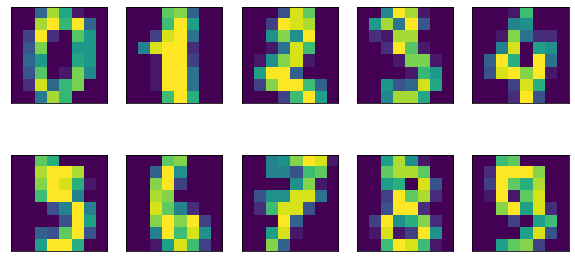

In [31]:
from sklearn.datasets import  load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

PCA를 사용해 데이터를 2차원으로 축소해 시각화 한 후, 처음 두 개의 주성분을 이용해 그래프를 그리고 각 샘플을 해당하는 클래스의 숫자로 나타내보자.

Text(0, 0.5, '두 번째 주성분')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


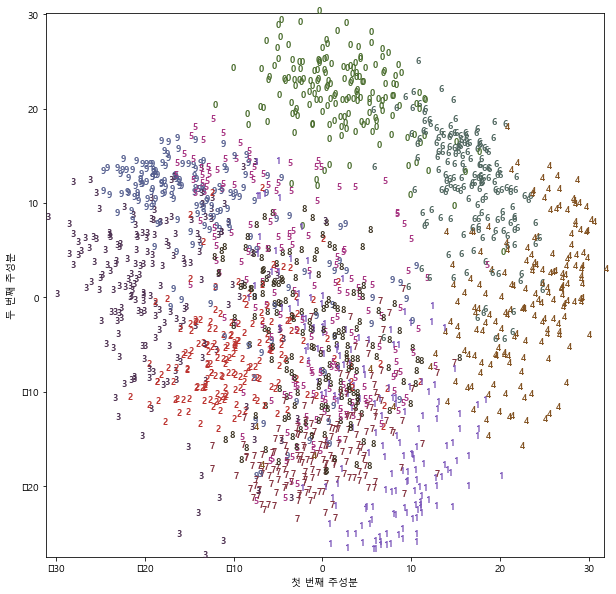

In [32]:
# PCA 모델을 생성한다.
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#845525',
         '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size':9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

이 그래프에서 각 클래스가 어디 있는지 보기 위해 실제 숫자를 사용해 산점도를 그렸다. 숫자 0, 6, 4는 두 개의 주성분만으로 비교적 잘 분리된 것 같지만, 아직 중첩된 부분이 있다. 다른 숫자들은 대부분 많은 부분이 겹쳐 있다.

같은 데이터셋에 t-SNE를 적용해 결과를 비교해보자. t-SNE는 새 데이터를 변환하는 기능을 제공하지 않으므로 TSNE 모델에는 transform 메서드가 없다. 대신 모델을 만들자마자 데이터를 변환해주는 fit_transform 메서드를 사용할 수 있다.

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE 특성 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


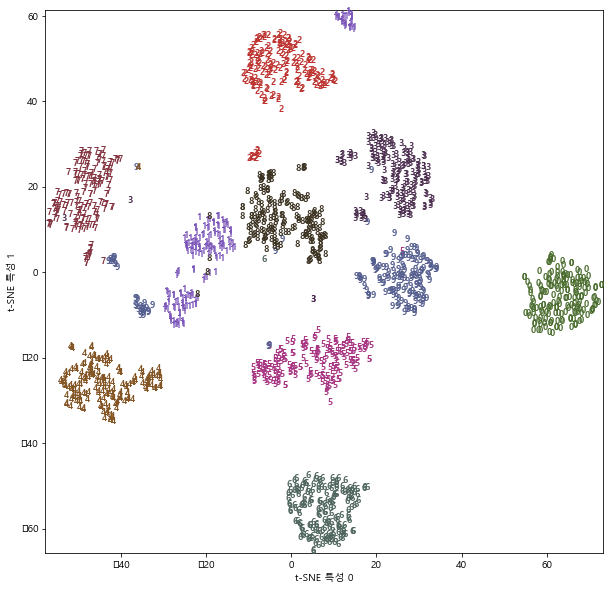

In [34]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

t-SNE의 결과는 매우 좋다. 모든 클래스가 확실히 잘 구분되었다. 1과 9는 조금 나뉘었지만 대부분의 숫자는 하나의 그룹으로 모여 있다. 이 알고리즘은 클래스 레이블 정보를 사용하지 않으므로 완전한 비지도 학습이다. 그럼에도 원본 데이터 공간에서 포인트들이 얼마나 가까이 있는지에 대한 정보로 클래스가 잘 구분되는 2차원 표현을 찾는다.

t-SNE는 매개변수를 약간 조정해야 하지만 기본값으로도 잘 작동하는 경우가 많다. perplexity와 early_exaggeration을 변경해볼 수 있지만, 보통 효과는 크지 않다.